In [1]:
# On regarde la data et on ne prend que 225 points pour train

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("data.csv")

In [161]:
# On adimensionne la data
df_modified = df[
    (df["Points:0"] >= 0.22)
    & (df["Points:1"] >= -0.1)
    & (df["Points:1"] <= 0.1)
    & (df["Time"] > 4)
    & (df["Time"] < 6)
] 
# Uniquement la fin de la turbulence

In [216]:
x_full, y_full, t_full = (
    np.array(df_modified["Points:0"]),
    np.array(df_modified["Points:1"]),
    np.array(df_modified["Time"]),
)
u_full, v_full, p_full = (
    np.array(df_modified["Velocity:0"]),
    np.array(df_modified["Velocity:1"]),
    np.array(df_modified["Pressure"]),
)

x_norm_full = (x_full - x_full.mean()) / x_full.std()
y_norm_full = (y_full - y_full.mean()) / y_full.std()
t_norm_full = (t_full - t_full.mean()) / t_full.std()
p_norm_full = (p_full - p_full.mean()) / p_full.std()
u_norm_full = (u_full - u_full.mean()) / u_full.std()
v_norm_full = (v_full - v_full.mean()) / v_full.std()


X_full = np.array([x_norm_full, y_norm_full, t_norm_full], dtype=np.float32).T

U_full = np.array([u_norm_full, v_norm_full, p_norm_full], dtype=np.float32).T

np.random.shuffle(X_full)  # pour pouvoir prendre des éléments au pif

In [217]:
print(f"Valeurs de x :{np.unique(x_full).shape[0]}")
print(f"Valeurs uniques de y : {np.unique(y_full).shape[0]}")
print(f"Valeurs uniques de t : {np.unique(t_full).shape[0]}")


Valeurs de x :190
Valeurs uniques de y : 414
Valeurs uniques de t : 82


In [218]:
# Elles sont désordonnées, on dirait aléatoires

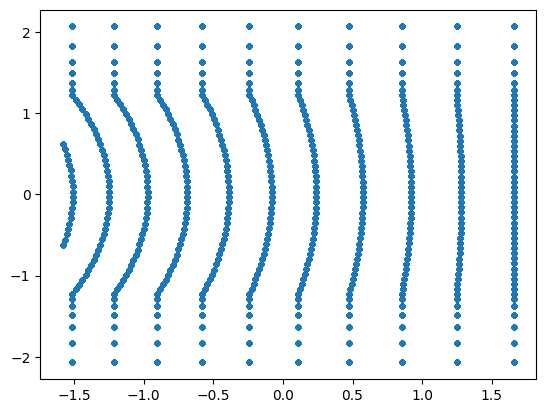

In [219]:
plt.scatter(X_full[:,0], X_full[:,1], marker='.')

In [220]:
# Pour chaque temps on regarde nombre de points

In [221]:
masque = X_full[:,2] == np.unique(t_norm_full)[23]
X_full[masque].shape

(1080, 3)

In [222]:
# A chaque pas de temps, on a 1080 points. On va le réduire par 5

In [223]:
couple_x_y = [(x,y) for x,y in X_full[masque][:,:2]]

In [254]:
couple_x_y_reduce = couple_x_y[:80]

In [255]:
len(couple_x_y_reduce)

80

In [256]:
masque_reduce = np.isin(X_full[:, :2], couple_x_y_reduce).all(axis=1)

In [257]:
X = X_full[masque_reduce]

In [258]:
masque2 = X[:,2] == np.unique(t_norm_full)[47]

In [259]:
X[masque2].shape

(320, 3)

In [260]:
X.shape

(26240, 3)

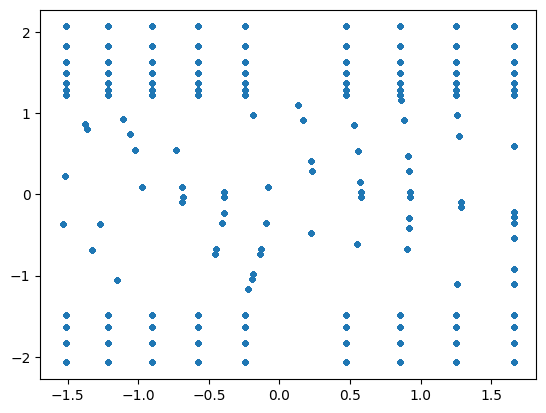

In [261]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [113]:
X_shuffle = np.random.shuffle(X_full)

In [114]:
X_shuffle

In [83]:
np.unique(X_full[masque][:,1])

array([-2.0714483, -1.8260198, -1.6372252, -1.4920002, -1.3802956,
       -1.2943621, -1.2282594,  1.2282594,  1.2943621,  1.3802956,
        1.4920002,  1.6372252,  1.8260198,  2.0714483], dtype=float32)

In [79]:
np.unique(x_norm_full)

array([-1.58147792, -1.56724765, -1.55456414, -1.54342741, -1.53383745,
       -1.52579425, -1.51929782, -1.51465752, -1.5134201 , -1.51125463,
       -1.50970786, -1.48774375, -1.46330481, -1.44010328, -1.41813917,
       -1.39710312, -1.37761384, -1.35905261, -1.34203816, -1.32626112,
       -1.3117215 , -1.29872865, -1.28697321, -1.27676453, -1.26810263,
       -1.26067814, -1.25480042, -1.25046947, -1.24737593, -1.24582917,
       -1.21365638, -1.19045486, -1.16849074, -1.14745469, -1.1273467 ,
       -1.10847613, -1.09053362, -1.07413787, -1.05867019, -1.04413056,
       -1.03113771, -1.01938227, -1.00886424, -0.99958363, -0.99154044,
       -0.98504401, -0.97947564, -0.97545404, -0.97297921, -0.97143245,
       -0.90213722, -0.88141052, -0.86192124, -0.84305067, -0.82510815,
       -0.80840305, -0.79231666, -0.77746768, -0.76385612, -0.75117262,
       -0.73941718, -0.72889916, -0.71930919, -0.711266  , -0.70415086,
       -0.69827314, -0.69332348, -0.68992059, -0.68744576, -0.68

In [56]:
X_full[masque]

array([], shape=(0, 3), dtype=float32)

In [42]:
masque

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
X_full.shape

(177120, 3)

In [30]:
masque

array([ True,  True,  True, ...,  True,  True,  True])

In [32]:
X_full[masque].shape

(177120, 3)

177120

In [11]:
# On plot 

In [11]:
from pyDOE import lhs

In [21]:
a = lhs(2, 40)

In [22]:
x = a [:, 0]
y = a[:, 1]

In [23]:
import matplotlib.pyplot as plt

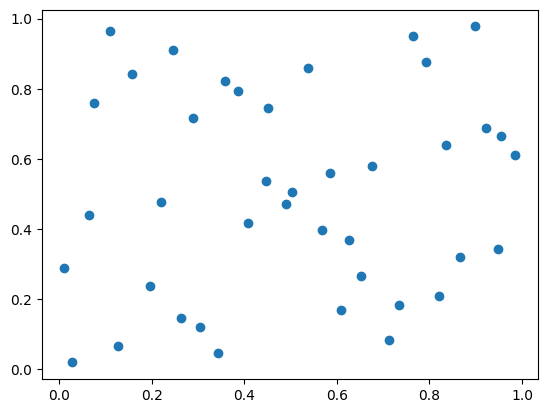

In [24]:
plt.scatter(x,y)